In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
from pygeocoder import Geocoder
import os
import scipy.stats as sps


In [2]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [3]:
haz_project_state = haz_project[['state', 'disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
state_project = haz_project_state.dropna()
state_project

,state,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,Alabama,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R
1,Alabama,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R
2,Alabama,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R
3,Alabama,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F
4,Alabama,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...,...
29187,Texas,5233.0,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,1890000.0,990000.00,1.400,229307.0,DR-5233-0011-R
29189,New Jersey,4086.0,602.1: Other Equipment Purchase and Installation,0,0,73430.0,66087.00,5.969,517419.0,DR-4086-0646-R
29190,Washington,4243.0,200.1: Acquisition of Private Real Property (S...,1,1,1535117.0,1151337.75,1.532,2351083.0,DR-4243-0009-R
29192,New Jersey,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.00,0.000,0.0,DR-4086-0647-R


In [4]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']].drop_duplicates(subset="disasterNumber")
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59392,3530,TX,EM,2020,Hurricane
59424,5323,WA,FM,2020,Fire
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


In [5]:
disaster_sum_clean["incidentType"].value_counts()

Fire                1403
Severe Storm(s)      982
Flood                836
Hurricane            374
Tornado              170
Snow                 165
Biological           157
Severe Ice Storm      62
Typhoon               58
Drought               46
Earthquake            35
Coastal Storm         29
Other                 26
Freezing              18
Toxic Substances       8
Mud/Landslide          7
Volcano                6
Dam/Levee Break        6
Fishing Losses         6
Human Cause            4
Tsunami                3
Terrorist              2
Chemical               1
Name: incidentType, dtype: int64

In [6]:
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state', 'incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary

numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

In [7]:
disaster_sum_clean["incidentType"].value_counts()

Fire                1403
Severe Storm(s)      982
Flood                836
Hurricane            374
Tornado              170
Snow                 165
Biological           157
Severe Ice Storm      62
Typhoon               58
Drought               46
Earthquake            35
Coastal Storm         29
Other                 26
Freezing              18
Toxic Substances       8
Mud/Landslide          7
Volcano                6
Dam/Levee Break        6
Fishing Losses         6
Human Cause            4
Tsunami                3
Terrorist              2
Chemical               1
Name: incidentType, dtype: int64

In [8]:
state_coords = pd.read_csv('state_lat_lng.csv')

lat_lng = pd.merge(state_coords, disaster_sum_clean, on='state')
lat_lng

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
0,AK,63.588753,-154.493062,Alaska,13,DR,1954,Other
1,AK,63.588753,-154.493062,Alaska,31,DR,1955,Other
2,AK,63.588753,-154.493062,Alaska,46,DR,1956,Other
3,AK,63.588753,-154.493062,Alaska,168,DR,1964,Earthquake
4,AK,63.588753,-154.493062,Alaska,230,DR,1967,Flood
...,...,...,...,...,...,...,...,...
4283,WY,43.075968,-107.290284,Wyoming,5139,FM,2016,Fire
4284,WY,43.075968,-107.290284,Wyoming,5241,FM,2018,Fire
4285,WY,43.075968,-107.290284,Wyoming,5276,FM,2018,Fire
4286,WY,43.075968,-107.290284,Wyoming,3479,EM,2020,Biological


In [9]:
storms_df = lat_lng[lat_lng["incidentType"] == "Severe Storm(s)"]
storms_df 

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
5,AK,63.588753,-154.493062,Alaska,281,DR,1970,Severe Storm(s)
16,AK,63.588753,-154.493062,Alaska,1039,DR,1994,Severe Storm(s)
19,AK,63.588753,-154.493062,Alaska,1316,DR,2000,Severe Storm(s)
21,AK,63.588753,-154.493062,Alaska,1445,DR,2003,Severe Storm(s)
23,AK,63.588753,-154.493062,Alaska,1461,DR,2003,Severe Storm(s)
...,...,...,...,...,...,...,...,...
4246,WV,38.597626,-80.454903,West Virginia,4331,DR,2017,Severe Storm(s)
4247,WV,38.597626,-80.454903,West Virginia,4378,DR,2018,Severe Storm(s)
4257,WY,43.075968,-107.290284,Wyoming,1351,DR,2001,Severe Storm(s)
4276,WY,43.075968,-107.290284,Wyoming,4007,DR,2011,Severe Storm(s)


In [11]:
storm_projects = disaster_projects[disaster_projects["incidentType"] == "Severe Storm(s)"]
storm_projects

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier,state,declarationType,fyDeclared,incidentType
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R,AL,DR,2011,Severe Storm(s)
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R,AL,DR,2011,Severe Storm(s)
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R,AL,DR,2011,Severe Storm(s)
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F,AL,DR,2011,Severe Storm(s)
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R,AL,DR,2011,Severe Storm(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,4423.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,40833.0,40833.0,0.000,0.0,DR-4423-0001-M,CA,DR,2019,Severe Storm(s)
22167,4479.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,36131.0,36131.0,0.000,0.0,DR-4479-0001-M,SC,DR,2020,Severe Storm(s)
22168,4542.0,700.1: Management Costs - Salaries; \n700.2: M...,0,0,46616.0,46616.0,0.000,0.0,DR-4542-0001-M,SC,DR,2020,Severe Storm(s)
22175,4418.0,700.1: Management Costs - Salaries; \n700.4: M...,0,0,259476.0,259476.0,0.000,0.0,DR-4418-0001-M,WA,DR,2019,Severe Storm(s)


In [12]:
storm_projects_group = storm_projects.groupby(["state", "disasterNumber", "projectIdentifier"]).mean()
storm_projects_group

numberOfProperties  \
state disasterNumber projectIdentifier                       
AK    1039.0         DR-1039-0002-R                     12   
                     DR-1039-0003-R                     27   
                     DR-1039-0004-R                      0   
                     DR-1039-M001-M                      0   
      1316.0         DR-1316-0001-R                     11   
...                                                    ...   
WY    4007.0         DR-4007-0007-R                      0   
                     DR-4007-0008-R                      0   
                     DR-4007-0009-R                      0   
      4306.0         DR-4306-0003-M                      0   
                     DR-4306-0004-R                      0   

                                        numberOfFinalProperties  \
state disasterNumber projectIdentifier                            
AK    1039.0         DR-1039-0002-R                          11   
                     DR-1039-0003-R                          27   
                     DR-1039-0004-R                           0   
                     DR-1039-M001-M                           0   
      1316.0         DR-1316-0001-R                          11   
...                                                         ...   
WY    4007.0         DR-4007-0007-R                           0   
                     DR-4007-0008-R                           0   
                     DR-4007-0009-R                           0   
      4306.0         DR-4306-0003-M                           0   
                     DR-4306-0004-R                           0   

                                        projectAmount  federalShareObligated  \
state disasterNumber projectIdentifier                                         
AK    1039.0         DR-1039-0002-R         8429993.0              6322495.0   
                     DR-1039-0003-R         1328065.0               919191.0   
                     DR-1039-0004-R          921989.0               691492.0   
                     DR-1039-M001-M          824824.0               618693.0   
      1316.0         DR-1316-0001-R          738920.0               554190.0   
...                                               ...                    ...   
WY    4007.0         DR-4007-0007-R           76113.0                57085.0   
                     DR-4007-0008-R         1217776.0               608003.0   
                     DR-4007-0009-R          151030.0               113273.0   
      4306.0         DR-4306-0003-M           17417.0                17417.0   
                     DR-4306-0004-R          127938.0                95953.5   

                                        benefitCostRatio  netValueBenefits  \
state disasterNumber projectIdentifier                                       
AK    1039.0         DR-1039-0002-R                1.516         7419336.0   
                     DR-1039-0003-R                1.291        10382364.0   
                     DR-1039-0004-R                1.063         1292236.0   
                     DR-1039-M001-M                0.000               0.0   
      1316.0         DR-1316-0001-R                5.924        10500000.0   
...                                                  ...               ...   
WY    4007.0         DR-4007-0007-R                2.508          250546.0   
                     DR-4007-0008-R                1.313         1598580.0   
                     DR-4007-0009-R                1.810          284957.0   
      4306.0         DR-4306-0003-M                0.000               0.0   
                     DR-4306-0004-R                6.222         2115692.0   

                                        fyDeclared  
state disasterNumber projectIdentifier              
AK    1039.0         DR-1039-0002-R           1994  
                     DR-1039-0003-R           1994  
                     DR-1039-0004-R           1994  
                     DR-1039-M001-M     

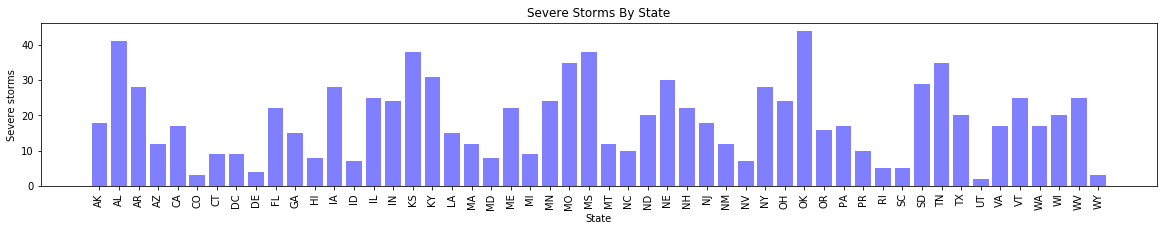

<Figure size 432x288 with 0 Axes>

In [13]:
number_storms = storms_merged_clean.groupby("state_ID")[["disasterNumber"]].count()
number_storms = number_storms.iloc[:,0]
x_axis = np.arange(len(number_storms))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_storms, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_storms.index, rotation="vertical")
plt.title("Severe Storms By State")
plt.xlabel("State")
plt.ylabel("Severe storms")
plt.show()
plt.savefig("output_data/severe_storms_by_state.png")

In [34]:
state_storms = storms_df.groupby("state")[["disasterNumber"]].count()
state_storms

,disasterNumber
state,
AK,18
AL,41
AR,28
AZ,12
CA,17
CO,3
CT,9
DC,9
DE,4


In [14]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [15]:
state_funding = pd.merge(disaster_sum_clean, hazard_sum_clean, on="disasterNumber")
state_funding

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,820,UT,DR,1989,Flood,95048.0
1,821,KY,DR,1989,Flood,579052.0
2,824,MN,DR,1989,Flood,201496.0
3,823,TX,DR,1989,Flood,0.0
4,822,WA,DR,1989,Flood,221682.0
...,...,...,...,...,...,...
1731,4552,MO,DR,2020,Severe Storm(s),0.0
1732,4553,ND,DR,2020,Flood,0.0
1733,4556,AR,DR,2020,Tornado,0.0
1734,4554,AL,DR,2020,Severe Storm(s),0.0


In [16]:
storm_funds = pd.merge(storms_df, hazard_sum_clean, on="disasterNumber")
storm_funds

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,AK,63.588753,-154.493062,Alaska,1039,DR,1994,Severe Storm(s),8719963.0
1,AK,63.588753,-154.493062,Alaska,1316,DR,2000,Severe Storm(s),1583458.0
2,AK,63.588753,-154.493062,Alaska,1445,DR,2003,Severe Storm(s),1695298.0
3,AK,63.588753,-154.493062,Alaska,1461,DR,2003,Severe Storm(s),203999.0
4,AK,63.588753,-154.493062,Alaska,1571,DR,2005,Severe Storm(s),464357.0
...,...,...,...,...,...,...,...,...,...
888,WV,38.597626,-80.454903,West Virginia,4331,DR,2017,Severe Storm(s),2482313.2
889,WV,38.597626,-80.454903,West Virginia,4378,DR,2018,Severe Storm(s),127648.0
890,WY,43.075968,-107.290284,Wyoming,1351,DR,2001,Severe Storm(s),98588.0
891,WY,43.075968,-107.290284,Wyoming,4007,DR,2011,Severe Storm(s),816983.0


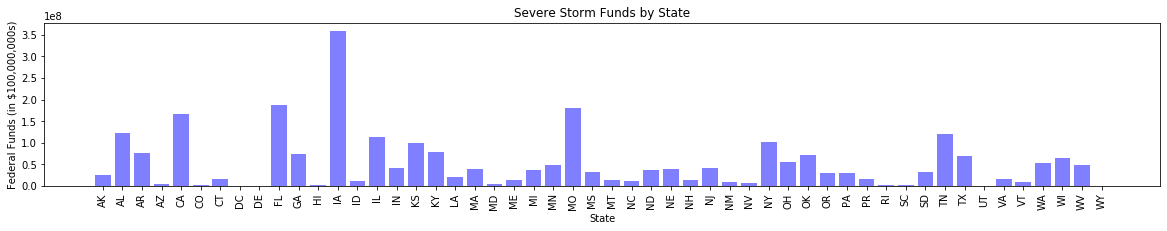

<Figure size 432x288 with 0 Axes>

In [18]:
storm_funds_amt = storm_funds.groupby("state")[["obligatedTotalAmount"]].sum()
storm_funds_amt = storm_funds_amt.iloc[:,0]
x_axis = np.arange(len(storm_funds_amt))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, storm_funds_amt, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, storm_funds_amt.index, rotation="vertical")
plt.title("Severe Storm Funds by State")
plt.xlabel("State")
plt.ylabel("Federal Funds (in $100,000,000s)")
plt.show()
plt.savefig("output_data/storm_funding_by_state.png")

In [30]:
state_funds = storm_funds.groupby("state")[["obligatedTotalAmount"]].sum()
state_funds

,obligatedTotalAmount
state,
AK,2.611004e+07
AL,1.221393e+08
AR,7.683732e+07
AZ,4.997635e+06
CA,1.657678e+08
CO,1.833649e+06
CT,1.725800e+07
DC,8.908149e+05
DE,1.257514e+06


In [43]:
state_storms_merge = pd.merge(state_funds, state_storms, on="state")
state_storms_merge["obligatedTotalAmount"].sort_values(ascending=False)

state
IA    3.596392e+08
FL    1.870653e+08
MO    1.802492e+08
CA    1.657678e+08
AL    1.221393e+08
TN    1.200357e+08
IL    1.141294e+08
NY    1.024555e+08
KS    1.006556e+08
KY    7.803699e+07
AR    7.683732e+07
GA    7.420869e+07
OK    7.198043e+07
TX    6.846688e+07
WI    6.607116e+07
OH    5.543694e+07
WA    5.234507e+07
MN    4.910875e+07
WV    4.865272e+07
NJ    4.292500e+07
IN    4.066175e+07
MA    3.987527e+07
NE    3.875081e+07
ND    3.828751e+07
MI    3.793295e+07
SD    3.186406e+07
MS    3.169424e+07
OR    2.931474e+07
PA    2.927314e+07
AK    2.611004e+07
LA    2.055263e+07
PR    1.741751e+07
VA    1.734479e+07
CT    1.725800e+07
MT    1.462646e+07
NH    1.414713e+07
ME    1.331561e+07
NC    1.123619e+07
ID    1.073047e+07
VT    9.295977e+06
NM    8.401830e+06
NV    7.607465e+06
MD    5.882930e+06
AZ    4.997635e+06
RI    3.560544e+06
HI    2.212796e+06
SC    2.024334e+06
CO    1.833649e+06
DE    1.257514e+06
WY    1.028942e+06
UT    9.683430e+05
DC    8.908149e+05
Name: 

In [ ]:
IA,FL,MO,CA,AL

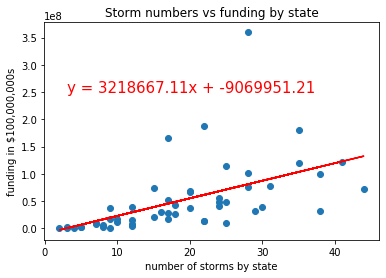

In [42]:
state_funds = state_storms_merge["obligatedTotalAmount"]
state_disasters = state_storms_merge["disasterNumber"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(state_disasters, state_funds)
regress_values = state_disasters * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(state_disasters, state_funds)
plt.plot(state_disasters, regress_values, "r-")
plt.annotate(line_eq,(3, 250000000),fontsize=15,color="red")
plt.xlabel("number of storms by state")
plt.ylabel("funding in $100,000,000s")
plt.title("Storm numbers vs funding by state")
plt.savefig("output_data/storm_number_vs_funding")